# Expanding candy brand
***

**Scenario** 

The ** purchasing group wants to expand our candy offering. These are store brand candies that we sell along the brand offerings. The idea is to create a brand new product. The team is discussing various options at the moment. Some prefer cookie-based sweets while others think that it should be gummies. The Divisional Director responsible for purchasing has decided to use a more data-driven approach. He contracted with a market research group to collect data on products in the market and their characteristics and customer sentiment. 
 
The market research data is now available and it is your job to find out which product characteristics drive customer sentiment and subsequently make a recommendation on a new product. 

 
 
**Data**   
The data set is located (incl. a short description) here: https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking The data set is provided by FiveThirtyEight under the Creative Commons Attribution 4.0 International license (https://creativecommons.org/licenses/by/4.0/) 
 


The data contains the following columns:  
- chocolate: Does it contain chocolate?
- fruity: Is it fruit flavored?
- caramel: Is there caramel in the candy?
- peanutalmondy: Does it contain peanuts, peanut butter or almonds?
- nougat: Does it contain nougat?
- crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
- hard: Is it a hard candy?
- bar: Is it a candy bar?
- pluribus: Is it one of many candies in a bag or box?
- sugarpercent: The percentile of sugar it falls under within the data set.
- pricepercent: The unit price percentile compared to the rest of the set.
- winpercent: The overall win percentage according to 269,000 matchups.


**Data Assumptions:**  
The motivation for creating the `candy-data` set was to support the buying decision in the supermarket when it comes to candy selection for halloween. For that, FiveThirtyEight did an experiment where 8,371 different IP addresses voted on about 269,000 randomly generated matchups.


**Limitations**  
The data was created online and there are no knowledge about the participants and thier preferences. Just the purpose of halloween is been known. It is therefore questioning wheter the data is reliable for teh german market.




## Imports
***

In [90]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data and Checkout
***


In [212]:
FILE = "candy-data.csv"
data = pd.read_csv(FILE, sep =",", encoding='latin-1')
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [213]:
data.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


# Descriptive Analysis
****

## Top 10 competitor / brands


In [214]:
# Top 10 candies
data_sort = data.sort_values(by="winpercent", ascending=False)[["competitorname", "winpercent"]] \
    .reset_index().drop("index", axis = 1)
data_sort.head(10)

,competitorname,winpercent
0,Reese's Peanut Butter cup,84.180290
1,Reese's Miniatures,81.866257
2,Twix,81.642914
3,Kit Kat,76.768600
4,Snickers,76.673782
5,Reese's pieces,73.434990
6,Milky Way,73.099556
7,Reese's stuffed with pieces,72.887901
8,Peanut butter M&M's,71.465050
9,Nestle Butterfinger,70.735641


Investigating the top 10 spots shows that Reese's has 4 candy types with a top 10 matchup win rate.
That is very significant but accordingly to FiveThirtyEight is this not surprisingly as this type of candy is quite associated with Halloween. 

## Candy Types

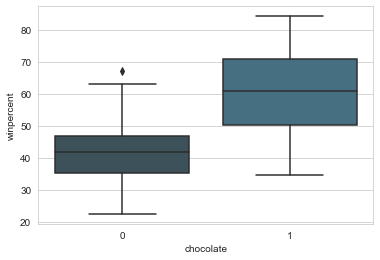

In [215]:
# chocolate
sns.boxplot(x = "chocolate", y = "winpercent", data=data)

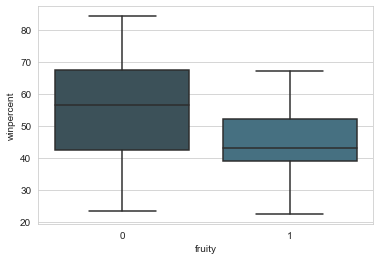

In [186]:
# fruity
sns.boxplot(x = "fruity", y = "winpercent", data=data)

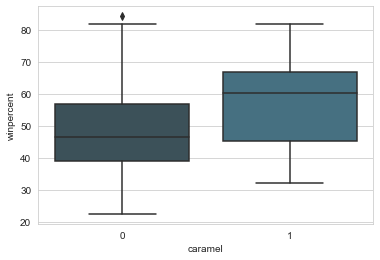

In [187]:
# caramel
sns.boxplot(x = "caramel", y = "winpercent", data=data)

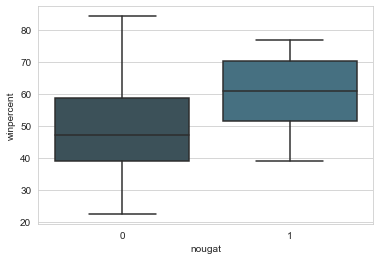

In [189]:
# nougat
sns.boxplot(x = "nougat", y = "winpercent", data=data)

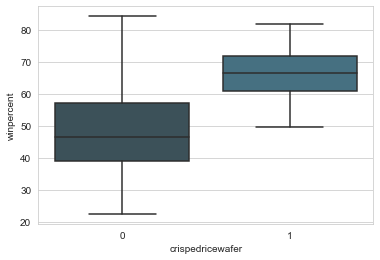

In [190]:
# crispedricewafer
sns.boxplot(x = "crispedricewafer", y = "winpercent", data=data)

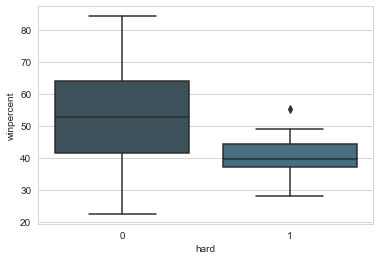

In [216]:
# hard
sns.boxplot(x = "hard", y = "winpercent", data=data)

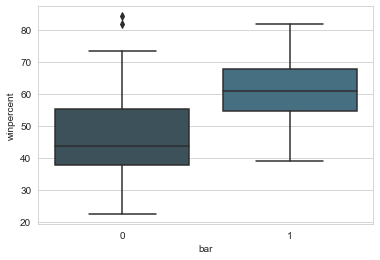

In [217]:
# bar
sns.boxplot(x = "bar", y = "winpercent", data=data)

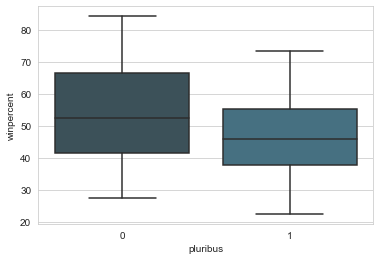

In [218]:
# pluribus
sns.boxplot(x = "pluribus", y = "winpercent", data=data)

## Top 10 candy type combinations
Regardless of the actual brand, what are the candy type combinations that drive the decision?   

In [69]:
# Get all combinations of the candy types
columns = [
        "chocolate"
        ,"fruity"
        ,"caramel"
        ,"peanutyalmondy"
        ,"nougat"
        ,"crispedricewafer"
        ,"hard"
        ,"bar"
        ,"pluribus"
       ]

candy_type_combind = []

for idx, row in data.iterrows():
    name_combind = ""

    for col in columns:
        if row[col] == 1:
            name_combind = name_combind + "_" + col 
    candy_type_combind.append(name_combind)
    
# Add combinations to data and filter by top10 avg win rate        
data["candy_type_combind"] = candy_type_combind
data_top10_combindation = data.groupby(["candy_type_combind"], as_index=True)['winpercent'] \
    .agg({"mean": np.mean,
          "count" : "count"}) \
    .sort_values(by="mean", ascending=False).reset_index().head(10)
    

# Add the brands to the top10 combination
candy_type_lookup = data.groupby(["candy_type_combind"]).groups
brand_decoder = {}

for idx, row in data.iterrows():
    brand_decoder[idx] = row["competitorname"] 

brand_list_top_10 = []
for idx, row in data_top10_combindation.iterrows():
    
    combination = str(row["candy_type_combind"])
    brand_list = []
    
    for brand in candy_type_lookup.get(combination):
        brand_list.append(brand_decoder.get(brand))
    
    brand_list_top_10.append(brand_list)
    
data_top10_combindation["brands"] = brand_list_top_10


pd.set_option('max_colwidth', 80)
data_top10_combindation

C:\Users\dtrie\Anaconda3\envs\tfEnv\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)



,candy_type_combind,mean,count,brands
0,_chocolate_peanutyalmondy,79.644816,3,"[Reese's Miniatures, Reese's Peanut Butter cup, Reese's stuffed with pieces]"
1,_chocolate_caramel_crispedricewafer_bar,74.307320,2,"[100 Grand, Twix]"
2,_chocolate_peanutyalmondy_pluribus,71.461276,3,"[Peanut butter M&M's, Peanut M&Ms, Reese's pieces]"
3,_chocolate_crispedricewafer_bar,68.507920,3,"[Hershey's Krackel, Kit Kat, Nestle Crunch]"
4,_chocolate_caramel_nougat_bar,66.950129,2,"[Milky Way, Milky Way Midnight]"
5,_chocolate_caramel_peanutyalmondy_nougat_bar,66.794164,2,"[Baby Ruth, Snickers]"
6,_chocolate_caramel_bar,64.353340,1,[Milky Way Simply Caramel]
7,_chocolate_caramel_pluribus,60.390179,2,"[Milk Duds, Rolo]"
8,_chocolate_caramel_peanutyalmondy_crispedricewafer_bar,59.529251,1,[Snickers Crisper]
9,_chocolate_peanutyalmondy_bar,58.536546,3,"[Almond Joy, Mr Good Bar, Nestle Butterfinger]"


Now the picture is already slightly different and gives us a good hint of which candy property drives the matchup win likelihood.

Interpreting the result:  

- The property that all top10 combinations have in common is chocolate followed by caramel. 
- All top10 brands are represented and 11 more none top10 brand.
- The best combination (chocolate and peanutyalmondy)  is just represented in the data by Resee's and it is hard to infer wheater the brand drives the decision here. 
- The second-best combination shows a top10 brand (Twix: 3) and a non top10 brand (100 Grand: 14).  
- This view is biased in terms of matchups within the same combination e.g. Baby Ruth and Snickers



## Sugare and Price

As chocolate and caramel mix seems to have a reasonable impact winning a matchup. Let's see how much the sugur and price are related to the win percentage.

In [91]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

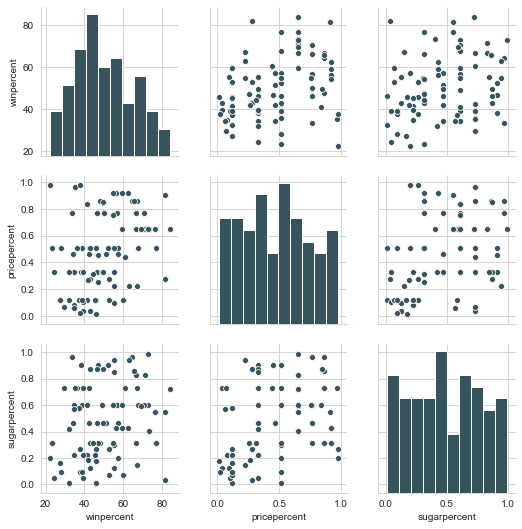

In [98]:
sns.pairplot(data[['winpercent','pricepercent', 'sugarpercent']])

,winpercent,pricepercent,sugarpercent
winpercent,1.000000,0.345325,0.229151
pricepercent,0.345325,1.000000,0.329706
sugarpercent,0.229151,0.329706,1.000000


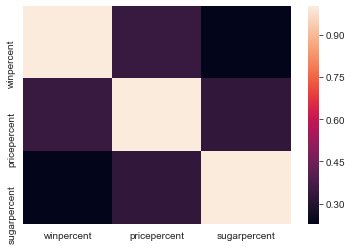

In [101]:
sns.heatmap(data[['winpercent','pricepercent', 'sugarpercent']].corr())

data[['winpercent','pricepercent', 'sugarpercent']].corr()

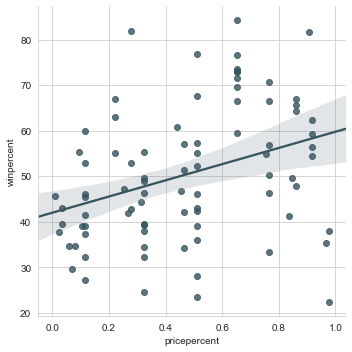

In [112]:
sns.lmplot(x='pricepercent',y='winpercent',data=data)

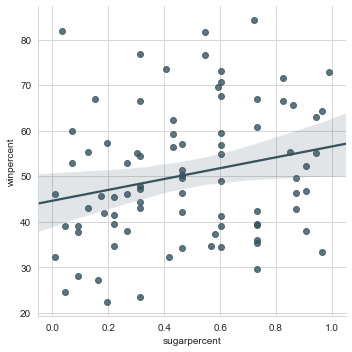

In [113]:
sns.lmplot(x='sugarpercent',y='winpercent',data=data)

Interpreting the result: 
- The imact of sugar and price on the matchup win is postive but low.  
- We can exclude them from the list of potential driving factors 
- The price however can be later used for the pricing process of the new store brand candies

# Linear Regression Model
***

**Import Functions**

In [123]:
from sklearn.linear_model import LinearRegression

**Split the data**

In [170]:
columns = [
        "chocolate"
        ,"fruity"
        ,"caramel"
        ,"peanutyalmondy"
        ,"nougat"
        ,"crispedricewafer"
        ,"hard"
        ,"bar"
        ,"pluribus"
       ]


X = data[columns]
y = data['winpercent']


**Train Model**

In [171]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Model Evaluation** 

- No prediction and residual analysis, to less data 

In [172]:
print("R² :", lm.score(X,y) )

R² : 0.5148097061389147


In [173]:
# print the intercept
print(lm.intercept_)

35.015458741530004


In [183]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df.sort_values("Coefficient",ascending=False )

,Coefficient
chocolate,19.905795
fruity,10.267732
peanutyalmondy,10.141017
crispedricewafer,8.991549
caramel,3.384282
nougat,2.416252
pluribus,-0.159917
bar,-0.721966
hard,-4.872560


Interpreting the result: 

- The model can explain around 51% of the variance of the winpercentage can be expalined by the candy properties
- A candy with none of the 9 properties has a matchup win percentage of 35%  
- **Chocolate** has the highest expected win rate add about 20%  
- Add a **fruity** component or **peanuty or almondy** let the expectation increase by 10%  
- If it contain **crisped rice, wafers or a cookie** component let the win expectation increase by 9%  
- **Caramel** add just 3% and **nougat** 2%  
- **Bar** candies let win chance drop by 0.7% and if its **hard** let them drop by 5%
- If its in a **bag or box** decreases the excpected win rate by 0.15%


##  Business Recommendation for a new store candy
***

According to the data, there are we can simplify and decide two things: 
    1. Which ingredients should the new candy have? 
    2. Which form and packing should it have? 


**Ingredients**  
For the ingredient combination, we should start with **chocolate** and mix some **caramel** in. Chocolate is included in each entry of the top10 combination list and it has the highest win expectation growth. Whereby caramel is given in 6 out of 10 most liked combinations. The costomer will 

Next, we can add some **peanuts, peanut butter or almonds** and it must possess **crisped rice, wafers, or a cookie** components.   
We should avoid **fruity** candy. Eventhough it has an add of 10% win percentage it also has an relatively low win expectation against non fruity candies and it is not involved in the top10 combination list.


The sugar does not weight to much inti the actual decision and teh price seems also not main value driver. Never the less at least the price must be aligned with the store pricing strategy in order to avoid cannibalisation of other similar brands in the store.


**Form and packing**  
The new candy supposed to be a ** not hard bar** and Is it not **one of many candies in a bag or box**.

## Prediction

How many percent of the time do we excpect to win our new store candy?

To answer this question, we lookup after candies with our properties and average their win percentage.

In [238]:
#

isSimilarCandy = [] 

for idx, row in data.iterrows():

    if (row["chocolate"]==1) & \
        (row["caramel"]==1) & \
        (row['peanutyalmondy']==1)  & \
        (row['crispedricewafer'] ==1) & \
        (row['hard'] == 0) & \
        (row['bar'] == 1) & \
        (row['pluribus'] == 0):
        isSimilarCandy.append(1)
        print(idx)
    else: 
        isSimilarCandy.append(0)

data.loc[65,:]  

65


competitorname      Snickers Crisper
chocolate                          1
fruity                             0
caramel                            1
peanutyalmondy                     1
nougat                             0
crispedricewafer                   1
hard                               0
bar                                1
pluribus                           0
sugarpercent                   0.604
pricepercent                   0.651
winpercent                   59.5293
Name: 65, dtype: object

## Model
***

In [159]:
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [160]:
# Create target categories

def target_class(x):
    if x <=.1:
        y = []
    elif x <= .2:
        y = 2
    elif x <= .3:
        y = 3
    elif x <= .4:
        y = 4
    elif x <=.5:
        y = 5
    elif x <= .6:
        y = 6
    elif x <= .7:
        y = 7
    elif x <= .8:
        y = 8
    elif x <= .9:
        y = 9
    else: y = 0
        
    return y

target = list(map(lambda x: target_class(x/100), data.winpercent))

# Convert labels to categorical one-hot encoding
one_hot_target = to_categorical(target , num_classes=10)

In [161]:
# Input Format
cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy','nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
NUM_CLASS = cols.__len__()

X = np.zeros((data.__len__(), NUM_CLASS))

for idx, row in data.iterrows():
    values = []
    
    for col in cols:
        values.append(row[col])
    
    X[idx, : ] = values  

In [162]:
def shuffling_train_test_split(X, y, test_size=0.18):
    NUM_TEST = round(int((test_size) * X.shape[0]) + 1)
    print("Spilt randomly: ", NUM_TEST)
    idxs = np.arange(0, X.__len__())
    idxs_test = random.sample(set(idxs), NUM_TEST)
    idxs_train = [idx for idx in idxs if idx not in idxs_test]
    
    X_test = np.array([X[i] for i in idxs_test])
    X_train = np.array([X[i] for i in idxs_train])
    y_test = np.array([y[i] for i in idxs_test])
    y_train = np.array([y[i] for i in idxs_train])
    
    return X_train, X_test, y_train, y_test

def sample_wr(population, k):
    print("Chooses k random elements (with replacement) from a population")
    n = len(population)
    _random, _int = random.random, int  # speed hack 
    result = [None] * k
    for i in range(k):
        j = _int(_random() * n)
        result[i] = population[j]
    return result


In [163]:
random.seed(18)
# Split test and train data
X_train, X_test, y_train, y_test = shuffling_train_test_split(X=X, y=one_hot_target)

# Bootstrap train data
tmp = [[x,y] for x,y in zip(X_train, y_train)]
tmp_bootstrap = sample_wr(tmp, 200)
X_train = np.array([tmp_bootstrap[i][0] for i in range(tmp_bootstrap.__len__())])
y_train = np.array([tmp_bootstrap[i][1] for i in range(tmp_bootstrap.__len__())])

print(X_train.__len__(), y_train.__len__())

Spilt randomly:  16
Chooses k random elements (with replacement) from a population
200 200


In [164]:
INPUT_DIM = 9

# Create a 1 layer deep neural network   
net = Sequential()
net.add(Dense(16, input_dim = INPUT_DIM, activation = "relu"))
net.add(Dense(32, activation = "relu"))
net.add(Dropout(0.5))
net.add(Dense(10,activation='softmax'))
net.compile(loss = 'categorical_crossentropy' #"mean_squared_error"
            ,optimizer='sgd', metrics=['accuracy'] #optimizer = Adam(lr = 0.01)
           )
# Train Model
net.fit(X_train, y_train #X, one_hot_target,
        ,epochs=500
        ,batch_size=3
       ,verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
200/200 [==============================] - 0s 1ms/step - loss: 2.2317 - accuracy: 0.2000
Epoch 2/500
200/200 [==============================] - 0s 751us/step - loss: 2.1127 - accuracy: 0.2250
Epoch 3/500
200/200 [==============================] - 0s 494us/step - loss: 1.9684 - accuracy: 0.2750
Epoch 4/500
200/200 [==============================] - 0s 494us/step - loss: 1.8839 - accuracy: 0.2200
Epoch 5/500
200/200 [==============================] - 0s 585us/step - loss: 1.8723 - accuracy: 0.2750
Epoch 6/500
200/200 [==============================] - 0s 415us/step - loss: 1.8170 - accuracy: 0.3050
Epoch 7/500
200/200 [==============================] - 0s 1ms/step - loss: 1.7912 - accuracy: 0.2750
Epoch 8/500
200/200 [==============================] - 0s 818us/step - loss: 1.7792 - accuracy: 0.3100
Epoch 9/500
200/200 [==============================] - 0s 73

In [165]:
net.evaluate(X_test, y_test, batch_size=1)

16/16 [==============================] - 0s 7ms/step


[4.353511639350927, 0.3125]

# Predict
***

In [248]:
# chocolate
X_test = np.array([[1,0,1,0,1,0,0,1,0]])

net.predict_classes(X_test)

array([8], dtype=int64)